# Tensorflow playground with code

Remember when we played witht the tensorflow playground? Well let's do a quick exercise in order to recreate these examples but with code!

* import `make_circles` from sklearn and create an object data containing circle data of 1000 observations, with some noise and a factor of your choice.



In [30]:
from sklearn.datasets import make_circles

data = make_circles(n_samples=1000,noise=0.1,factor=0.5)
print(data)

(array([[ 0.17895199, -0.62599419],
       [-0.21485971,  0.40488322],
       [-0.29775264,  0.30855941],
       ...,
       [ 1.00621918,  0.6129367 ],
       [-0.8849001 , -0.52354128],
       [ 0.50258231,  0.12399587]]), array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,

* Create an object `x` and `y` containing the training and target variable respectively.

In [31]:
x = data[0]
y = data[1]

* Visualize the data

In [32]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

fig = go.Figure(data=[
                      go.Scatter(
                          x = x[:,0],
                          y = x[:,1],
                          mode = "markers",
                          marker = dict(
                              color=y,
                              colorscale=color_chart[0:2]
                          ),
                      )
])

fig.show()

* Split them in train and validation set with sklearn

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y)

* Form two batch datasets, one for training data, one for validation data

In [34]:
import tensorflow as tf

train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val = tf.data.Dataset.from_tensor_slices((x_val,y_val))

train_batch = train.shuffle(len(train)).batch(8)
val_batch = val.shuffle(len(val)).batch(8)

* Create a neural network model in order to make predictions on this dataset, try and make it as simple as possible.

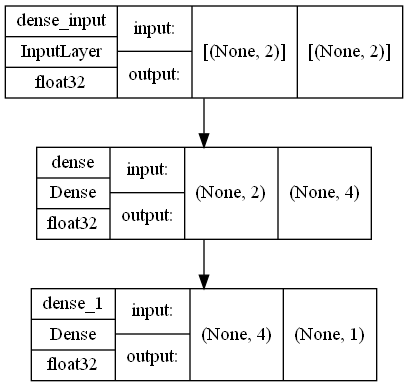

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
                    Dense(4,"relu", input_shape=[2]),
                    Dense(1,"sigmoid")                                    
])

tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

* Compile the model using Adam and a loss function and metric that suit our problem.

In [35]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

* Train the model over 100 epochs

In [36]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.8470 - binary_accuracy: 0.8760 - val_loss: 0.1436 - val_binary_accuracy: 0.9640
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1107 - binary_accuracy: 0.9867 - val_loss: 0.1081 - val_binary_accuracy: 0.9840
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0871 - binary_accuracy: 0.9907 - val_loss: 0.0834 - val_binary_accuracy: 0.9960
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0665 - binary_accuracy: 0.9933 - val_loss: 0.0931 - val_binary_accuracy: 0.9880
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0614 - binary_accuracy: 0.9973 - val_loss: 0.0657 - val_binary_accuracy: 0.9960
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0617 - binary_accuracy: 0.9973 - val_loss: 0.0746 - val_binary_accuracy: 0.9960
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - los

* Plot the evolution of the train loss and the validation loss and the evolution of the train metric and the validation metric.

In [9]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

In [10]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["binary_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_binary_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'    
)
fig.show()

* Did the model overfit ?

* Can you try and plot the decision function of the model in the data space? Like we saw in the tensorflow playground? You can get inspiration <a href="https://plotly.com/python/knn-classification/"> here </a>

In [11]:
from plotly import express as px
import numpy as np
x1_example = np.linspace(-2,2,100)
x2_example = np.linspace(-2,2,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
    )
])
fig.add_trace(go.Scatter(x = x[:,0],
                         y = x[:,1],
                         mode = "markers",
                         marker = dict(
                             color=y,
                             colorscale=color_chart[0:2])
                         )
)
fig.show()

* Use the following code to produce some spiral data:

In [12]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 1000
theta = np.sqrt(np.random.rand(N))*4*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)
x_a = x_a/np.abs(x_a).max()

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)
x_b = x_b/np.abs(x_b).max()

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

fig = go.Figure(data=[
                      go.Scatter(x=res[:,0],
                                 y=res[:,1],
                                 mode="markers",
                                 marker=dict(
                                     color=res[:,2],
                                     colorscale=color_chart[0:2]
                                     )
                                 )
                      ]
                )
fig.show()

data = res[:,0:2]
target = res[:,-1]

* Split into train and validation set

In [13]:
X_train, X_val, y_train, y_val = train_test_split(data, target)

* Form a train and validation batch dataset

In [14]:
train_batch = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(len(X_train)).batch(8)
val_batch = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(len(X_val)).batch(8)

In [15]:
next(iter(train_batch))

(<tf.Tensor: shape=(8, 2), dtype=float64, numpy=
 array([[ 0.89674485, -0.01986669],
        [ 0.18844576, -0.21453914],
        [-0.90190347,  0.35684472],
        [ 0.82916887, -0.3537334 ],
        [-0.25977713, -0.32014615],
        [ 0.52834573, -0.01421134],
        [ 0.08184221, -0.81761235],
        [ 0.37957205, -0.1877985 ]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([0., 1., 1., 0., 0., 0., 0., 0.])>)

* Create a neural network model that can acheive good predictions on the train set (for now we do not care about overfitting)

In [16]:
model = Sequential([
                    Dense(64,"relu",input_shape=[2]),
                    Dense(32,"relu"),
                    Dense(1,"sigmoid")
])

* Compile the model with the right loss and metric and Adam optimizer

In [17]:
model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

* Train the model over 100 epochs

In [18]:
history = model.fit(train_batch,epochs=100,validation_data=val_batch)

Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.6262 - binary_accuracy: 0.6200 - val_loss: 0.5718 - val_binary_accuracy: 0.6660
Epoch 2/100
188/188 [==============================] - 0s 1ms/step - loss: 0.5233 - binary_accuracy: 0.6753 - val_loss: 0.5269 - val_binary_accuracy: 0.6520
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4499 - binary_accuracy: 0.7067 - val_loss: 0.4001 - val_binary_accuracy: 0.7320
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4455 - binary_accuracy: 0.7093 - val_loss: 0.4445 - val_binary_accuracy: 0.7260
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4063 - binary_accuracy: 0.7680 - val_loss: 0.3630 - val_binary_accuracy: 0.8440
Epoch 6/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3226 - binary_accuracy: 0.8313 - val_loss: 0.2871 - val_binary_accuracy: 0.8560
Epoch 7/100
188/188 [==============================] - 0s 

* Is the model overfitting? Use visualization

In [19]:
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

* Visualize the decision boundary, would you say the model could benefit from some regularization?

In [20]:
from plotly import express as px
import numpy as np
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
    )
])
fig.add_trace(go.Scatter(x = data[:,0],
                         y = data[:,1],
                         mode = "markers",
                         marker = dict(
                             color=target,
                             colorscale=color_chart[0:2])
                         )
)
fig.show()

* Create a new model and add regularization to each layer, train it and visualize the decision boundary

In [21]:
from tensorflow.keras.regularizers import L2
l2 = L2(0.0001)

model = Sequential([
                    Dense(64,"relu",input_shape=[2], kernel_regularizer=l2),
                    Dense(32,"relu", kernel_regularizer=l2),
                    Dense(1,"sigmoid", kernel_regularizer=l2)
])

model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])



In [22]:
history = model.fit(train_batch,epochs=500,validation_data=val_batch)

Epoch 1/500
188/188 [==============================] - 1s 2ms/step - loss: 0.6394 - binary_accuracy: 0.6307 - val_loss: 0.5912 - val_binary_accuracy: 0.6720
Epoch 2/500
188/188 [==============================] - 0s 2ms/step - loss: 0.5723 - binary_accuracy: 0.6533 - val_loss: 0.5290 - val_binary_accuracy: 0.7220
Epoch 3/500
188/188 [==============================] - 0s 2ms/step - loss: 0.4850 - binary_accuracy: 0.7033 - val_loss: 0.4304 - val_binary_accuracy: 0.7200
Epoch 4/500
188/188 [==============================] - 0s 2ms/step - loss: 0.4552 - binary_accuracy: 0.7087 - val_loss: 0.4160 - val_binary_accuracy: 0.7520
Epoch 5/500
188/188 [==============================] - 0s 1ms/step - loss: 0.4396 - binary_accuracy: 0.7193 - val_loss: 0.4561 - val_binary_accuracy: 0.7500
Epoch 6/500
188/188 [==============================] - 0s 1ms/step - loss: 0.4512 - binary_accuracy: 0.6867 - val_loss: 0.4073 - val_binary_accuracy: 0.7540
Epoch 7/500
188/188 [==============================] - 0s 

In [23]:
from plotly import express as px
import numpy as np
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
    )
])
fig.add_trace(go.Scatter(x = data[:,0],
                         y = data[:,1],
                         mode = "markers",
                         marker = dict(
                             color=target,
                             colorscale=color_chart[0:2])
                         )
)
fig.show()

It looks like regularization only very marginally improves the model.